In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [60]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

all_df = pd.concat(([train_df,test_df]))

### 1.PassengerId

In [74]:
all_df["FamilyGroup"] = all_df["PassengerId"].str.split("_").str[0].astype("float")
all_df["GroupNumber"] = all_df["PassengerId"].str.split("_").str[1].astype("float")/10
all_df["FamilyGroup"]+= all_df["GroupNumber"]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FamilyGroup,GroupNumber
4272,9266_02,Earth,True,G/1496/S,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Peter,NaN,9266.2,0.2
4273,9269_01,Earth,False,NaN,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Scheron,NaN,9269.1,0.1
4274,9271_01,Mars,True,D/296/P,55 Cancri e,NaN,False,0.0,0.0,0.0,0.0,0.0,Pore,NaN,9271.1,0.1
4275,9273_01,Europa,False,D/297/P,NaN,NaN,False,0.0,2680.0,0.0,0.0,523.0,Conale,NaN,9273.1,0.1
4276,9277_01,Earth,True,G/1498/S,PSO J318.5-22,43.0,False,0.0,0.0,0.0,0.0,0.0,Leonzaley,NaN,9277.1,0.1


In [75]:
all_df.drop(columns=["PassengerId","GroupNumber"],inplace=True)

In [78]:
all_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,FamilyGroup
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Ofracculy,False,1.1
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Vines,True,2.1
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Susent,False,3.1
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Susent,False,3.2
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Santantines,True,4.1


### 2.HomePlanet

In [85]:
all_df.CryoSleep = all_df.CryoSleep.astype("boolean")
all_df.HomePlanet.value_counts(dropna=False)

HomePlanet
Earth     6865
Europa    3133
Mars      2684
NaN        288
Name: count, dtype: int64

In [104]:
all_df.groupby(["Destination"]).HomePlanet.apply(lambda x:x.mode()[0])
all_df.isna().sum()

HomePlanet       288
CryoSleep        310
Cabin            299
Destination      274
Age              270
VIP              296
RoomService      263
FoodCourt        289
ShoppingMall     306
Spa              284
VRDeck           268
Name             294
Transported     4277
FamilyGroup        0
dtype: int64

### 1 Name

In [63]:
all_df["Name"] = all_df.Name.str.split(" ").str[-1]

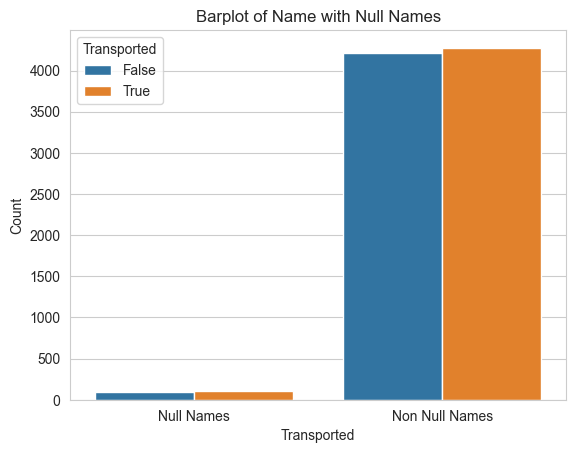

In [64]:
# Filter the DataFrame for null names
null_names_df = all_df[all_df['Name'].isnull()].copy()

null_names_df.Name.fillna("Null Names",inplace=True)

# Filter the DataFrame for non-null names
non_null_names_df = all_df[all_df['Name'].notnull()].copy()

non_null_names_df["Name"] = non_null_names_df.Name.apply(lambda x: "Non Null Names")

# Combine the filtered DataFrames into a single DataFrame
plot_df = pd.concat([null_names_df, non_null_names_df])



# Plot the barplot
sns.countplot(data=plot_df, x="Name", hue="Transported")

# Set labels and title
plt.xlabel('Transported')
plt.ylabel('Count')
plt.title('Barplot of Name with Null Names')

# Display the plot
plt.show()

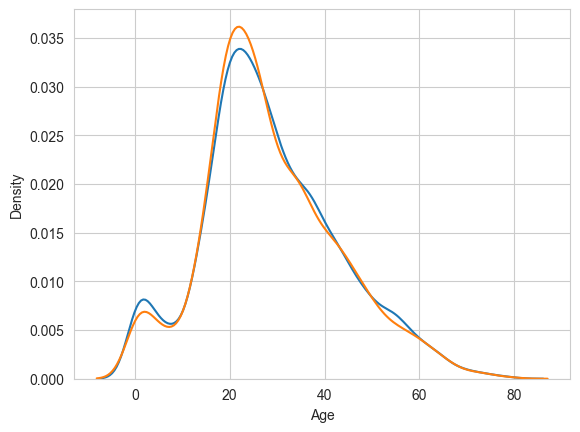

In [65]:
sns.kdeplot(data=train_df.Age,legend=True)
sns.kdeplot(data=test_df.Age,legend=True)

plt.show()

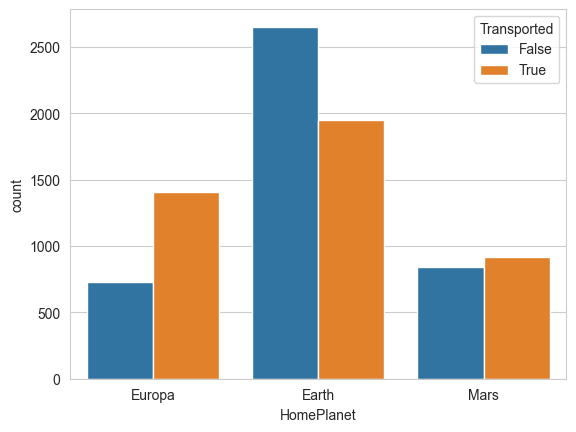

In [66]:
sns.countplot(x=all_df.HomePlanet,hue=all_df.Transported)
plt.show()

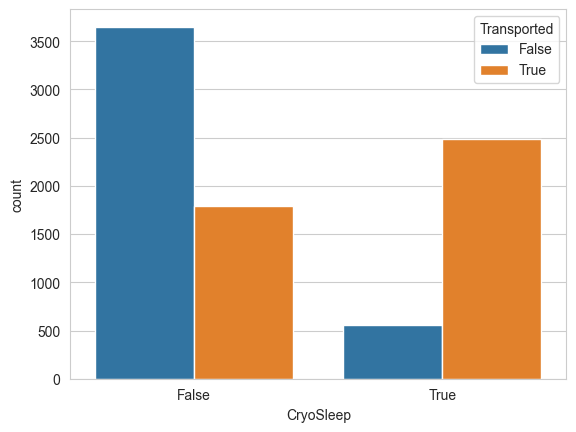

In [67]:
sns.countplot(x=all_df.CryoSleep,hue=all_df.Transported)
plt.show()